# This Notebook is for generating figures for the RPKI Data-Plane measurements paper.

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle

import schedule_measurements

In [2]:
# Load http and traceroute objects
#http, traceroute = load_updated_measurements(measurement_ids, folder_prefix, date, previous_day)

In [3]:
#This function returns a dict which includes all the ASNs with a count, how often they occured
def consecutive_asns(resultsets, position):
    counter = {}
    for resultset in resultsets:
         for asn in resultset['2'][position]:
            if asn not in counter:
                counter[asn] = 1
            else:
                counter[asn] += 1
    return counter

Loading new measurement runs: 2/3, 4/5, 8/9, 16/17 July 2021:

In [4]:
#Load resultfiles object
folder_prefix = "Atlas/annet/"
with open(folder_prefix + '20210703/resultset_asns.json') as json_file: resultset_asns_20210703 = json.load(json_file)
with open(folder_prefix + '20210705/resultset_asns.json') as json_file: resultset_asns_20210705 = json.load(json_file)
with open(folder_prefix + '20210709/resultset_asns.json') as json_file: resultset_asns_20210709 = json.load(json_file)
with open(folder_prefix + '20210717/resultset_asns.json') as json_file: resultset_asns_20210717 = json.load(json_file)
with open(folder_prefix + '20210719/resultset_asns.json') as json_file: resultset_asns_20210719 = json.load(json_file)
with open(folder_prefix + '20201208/PEERING_peers.json', "r") as read_file: peering_peers = json.load(read_file)
resultsets = [resultset_asns_20210703, resultset_asns_20210705, resultset_asns_20210709, resultset_asns_20210717, resultset_asns_20210719]

## Next we are going to print the identification rates of our approach:

In [5]:
print("Run, 1hop-Full, Case2a, case2b, 2+hops-Full, case4a, case4b, total_rov, whitelisted, total_minus_strict")
i = 0
for resultset in resultsets:
    i += 1
    print(i, len(resultset['2'][112]), len(resultset['2'][113]), len(resultset['2'][116]), len(resultset['2'][119]), len(resultset['2'][120]), len(resultset['2'][123]), len(resultset['2'][129]),len(resultset['2'][126]),len(resultset['2'][130]))

Run, 1hop-Full, Case2a, case2b, 2+hops-Full, case4a, case4b, total_rov, whitelisted, total_minus_strict
1 43 181 15 803 2 11 206 630 146
2 43 181 15 798 2 10 205 628 147
3 42 182 15 775 2 6 202 626 148
4 41 175 13 731 2 7 194 628 139
5 37 181 12 711 1 8 199 587 151


## Next, we generate a bar plot showing how many AS were identified in how many runs:

This is for Total - strict (Fully filtering)
ROV ASNs during all days:  167
# ASs which occured 5x:  122
# ASs which occured 4x:  14
# ASs which occured 3x:  12
# ASs which occured 2x:  10
# ASs which occured 1x:  9


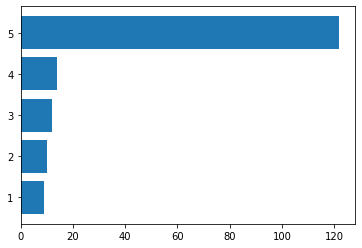

This is for Total ROV - Fully Filtering (Partially filtering)
ROV ASNs during all days:  66
# ASs which occured 5x:  45
# ASs which occured 4x:  5
# ASs which occured 3x:  6
# ASs which occured 2x:  2
# ASs which occured 1x:  8


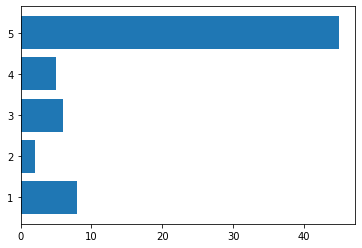

This is for Total Unique ROV (Fully+Partially filtering)
ROV ASNs during all days:  221
# ASs which occured 5x:  177
# ASs which occured 4x:  12
# ASs which occured 3x:  15
# ASs which occured 2x:  11
# ASs which occured 1x:  6


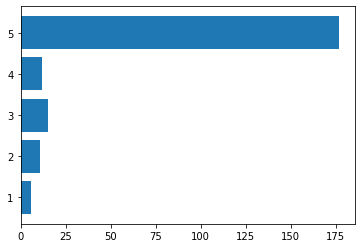

In [6]:
print('This is for Total - strict (Fully filtering)')

counter = consecutive_asns(resultsets, 130) #130: total - strict

#print(counter)
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))
print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()


print('This is for Total ROV - Fully Filtering (Partially filtering)')

counter = {}
for resultset in resultsets:
    partially_filtering = (set(resultset['2'][129]) - set(resultset['2'][130]))
    for asn in partially_filtering:
        if asn not in counter:
            counter[asn] = 1
        else:
            counter[asn] += 1
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))

print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()



print('This is for Total Unique ROV (Fully+Partially filtering)')

counter = consecutive_asns(resultsets, 129) #129: total unique rov
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))

print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()

This is for 1hop - Full reachability
ROV ASNs during all days:  46
# ASs which occured 5x:  35
# ASs which occured 4x:  4
# ASs which occured 3x:  3
# ASs which occured 2x:  2
# ASs which occured 1x:  2


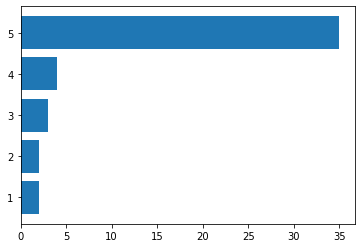

This is for 1hop - Invalid fail
ROV ASNs during all days:  196
# ASs which occured 5x:  160
# ASs which occured 4x:  10
# ASs which occured 3x:  14
# ASs which occured 2x:  6
# ASs which occured 1x:  6


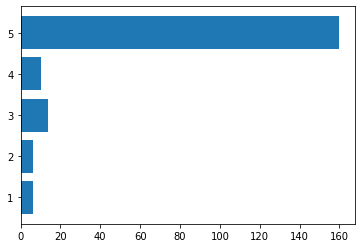

This is for 1hop - Route divergence
ROV ASNs during all days:  15
# ASs which occured 5x:  12
# ASs which occured 4x:  1
# ASs which occured 3x:  2
# ASs which occured 2x:  0
# ASs which occured 1x:  0


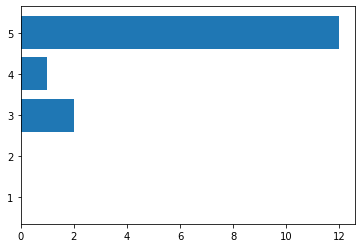

This is for 2+hops - Full reachability
ROV ASNs during all days:  897
# ASs which occured 5x:  596
# ASs which occured 4x:  108
# ASs which occured 3x:  78
# ASs which occured 2x:  57
# ASs which occured 1x:  58


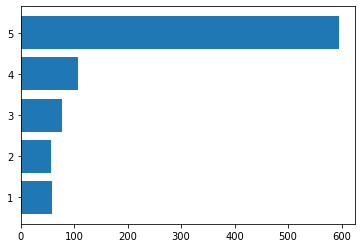

This is for 2+hops - Invalid fail
ROV ASNs during all days:  2
# ASs which occured 5x:  1
# ASs which occured 4x:  1
# ASs which occured 3x:  0
# ASs which occured 2x:  0
# ASs which occured 1x:  0


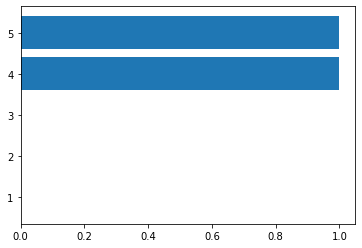

This is for 2+hop - Route divergence
ROV ASNs during all days:  13
# ASs which occured 5x:  5
# ASs which occured 4x:  1
# ASs which occured 3x:  0
# ASs which occured 2x:  6
# ASs which occured 1x:  1


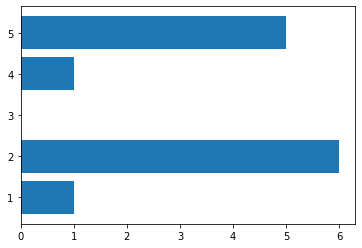

This shows ASes in min.3 runs for the whitelist
ROV ASNs during all days:  722
# ASs which occured 5x:  503
# ASs which occured 4x:  70
# ASs which occured 3x:  52
# ASs which occured 2x:  51
# ASs which occured 1x:  46


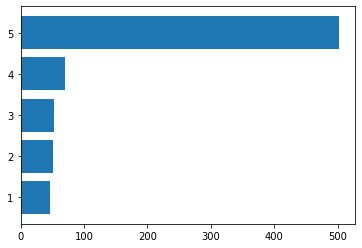

In [7]:
print('This is for 1hop - Full reachability')

counter = consecutive_asns(resultsets, 112) #140: 1_hop_successful_unique_total

#print(counter)
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))
print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()


print('This is for 1hop - Invalid fail')

counter = consecutive_asns(resultsets, 113) #113: case2a_unique_total

#print(counter)
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))
print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()


print('This is for 1hop - Route divergence')

counter = consecutive_asns(resultsets, 116) #116: case2b_unique_total

#print(counter)
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))
print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()


print('This is for 2+hops - Full reachability')

counter = consecutive_asns(resultsets, 119) #119: 2plus_hop_successful_unique_total

#print(counter)
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))
print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()


print('This is for 2+hops - Invalid fail')

counter = consecutive_asns(resultsets, 120) #120: case4a_unique_total

#print(counter)
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))
print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()


print('This is for 2+hop - Route divergence')

counter = consecutive_asns(resultsets, 123) #123: case4b_unique_total

#print(counter)
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))
print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()




print('This shows ASes in min.3 runs for the whitelist')

counter = consecutive_asns(resultsets, 126) #126: unique_total_whitelist_strict

#print(counter)
            
#print(dict(sorted(counter.items(), key=lambda item: item[1])))
print('ROV ASNs during all days: ', len(counter))
print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))

#Show bar plot
x_pos = (sum(map((5).__eq__, counter.values())), sum(map((4).__eq__, counter.values())), sum(map((3).__eq__, counter.values())), sum(map((2).__eq__, counter.values())), sum(map((1).__eq__, counter.values())))
height = [5,4,3,2,1]
bars = ('5', '4', '3', '2', '1')
plt.barh(height, x_pos)
plt.show()

## Calculate Union of all measurement runs 

In [8]:
print('Union of all runs for 1hop - Full reachability', len(consecutive_asns(resultsets, 112))) #112: 1_hop_successful_unique_total
print('Union of all runs for 1hop - Invalid fail', len(consecutive_asns(resultsets, 113))) #113: 1hop invalid fail
print('Union of all runs for 1hop - route divergence', len(consecutive_asns(resultsets, 116))) #116: 1hop route divergence

print('Union of all runs for 2hop - Full reachability', len(consecutive_asns(resultsets, 119))) #119: 2+hop Full reachability
print('Union of all runs for 2hop - Invalid fail', len(consecutive_asns(resultsets, 120))) #120: 2hop invalid fail
print('Union of all runs for 2hop - route divergence', len(consecutive_asns(resultsets, 123))) #123: 2hop route divergence

print('Union of all runs for Total unique ROV', len(consecutive_asns(resultsets, 129))) #129: rov_unique_total

print('Union of all runs for whitelist', len(consecutive_asns(resultsets, 127))) #127: unique_total_whitelist_strict

print('Union of all runs for fully filtering', len(consecutive_asns(resultsets, 130))) #130: total - strict


Union of all runs for 1hop - Full reachability 46
Union of all runs for 1hop - Invalid fail 196
Union of all runs for 1hop - route divergence 15
Union of all runs for 2hop - Full reachability 897
Union of all runs for 2hop - Invalid fail 2
Union of all runs for 2hop - route divergence 13
Union of all runs for Total unique ROV 221
Union of all runs for whitelist 155
Union of all runs for fully filtering 167


## We will obtain the PEERING peer list and the RIPE Atlas probe list to tell how many RIPE Atlas probes we used and how many of those are directly connected to PEERING.

In [9]:
# Get probes used for this measurement
unique_asns = dict()
with open('Atlas/20210626.json') as json_file:
    data = json.load(json_file)
    for p in data['objects']:
        if p['status_name'] == "Connected" and p['asn_v4'] != None:
            if not p['asn_v4'] in unique_asns:
                unique_asns[p['asn_v4']] = []
            unique_asns[p['asn_v4']].append(p['id'])

    print('Unique ASNs: ' + str((len(unique_asns))))

    total_probes = 0
    probes = []
    for key, value in unique_asns.items():
        # only use first 3 probes for every ASN
        if len(value) > 3:
            value = value[:3]

        total_probes += len(value)
        for probe in value:
            probes.append(probe)

    print('Total probes: ' + str((total_probes)))
    print('Probes per ASN: ' + str(total_probes / (len(unique_asns))))
    probes.sort()
    
RIPE_unique_asns = set()
for asn in unique_asns.keys(): RIPE_unique_asns.add(str(asn))

# Transform PEERING json into set
PEERING_asns = set()
for peer in peering_peers:
    if peer['IP version'] == 'IPv4' and peer['Peer ASN'] != None and peer['Route Server'] != True:
        PEERING_asns.add(peer['Peer ASN'])
        
print('Number of directly connected IPv4 ASs to PEERING: ', len(PEERING_asns))

RIPE_to_PEERING = RIPE_unique_asns.intersection(PEERING_asns)
print('Number of RIPE Atlas Vantage Points directly connected to PEERING: ', len(RIPE_to_PEERING))
print()



Unique ASNs: 3697
Total probes: 5543
Probes per ASN: 1.4993237760346227
Number of directly connected IPv4 ASs to PEERING:  174
Number of RIPE Atlas Vantage Points directly connected to PEERING:  73



## How many of directly connected RIPE Atlas probes have been flagged as ROV enforcing? 

We only need to check for case2a as for case2b we don´t have anything for ams and seattle w/o the routeservers.

In [10]:
ROV_peering_and_ripe = set()

# This is to check 3days consecutives for Seattle
#print('Seattle case2a >= 3 days')
counter = consecutive_asns(resultsets, 15) #15: seattle_wo_RS 2a
#print(dict(sorted(seattle_case2a_counter.items(), key=lambda item: item[1])))
#print('ROV ASNs during all days: ', len(counter))
#print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
#print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
#print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
#print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
#print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))
#print() 

print('ASNs more than 3 times in measurements for Seattle: ')
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)

    
# This is to check 3days consecutives for Amsterdam
#print()
#print('Amsterdam case2a >= 3 days')
counter = consecutive_asns(resultsets, 29) #29: amsterdam_wo_RS 2a
#print(dict(sorted(seattle_case2a_counter.items(), key=lambda item: item[1])))
#print('ROV ASNs during all days: ', len(counter))
#print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
#print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
#print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
#print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
#print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))
#print()
print('ASNs more than 3 times in measurements for AMS: ')
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)
        
        
counter = consecutive_asns(resultsets, 57) #57: gatech 2a
print('ASNs more than 3 times in measurements for gatech: ')
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)
        
counter = consecutive_asns(resultsets, 71) #71: uw 2a
print('ASNs more than 3 times in measurements for uw: ')
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)

counter = consecutive_asns(resultsets, 85) #71: grnet 2a
print('ASNs more than 3 times in measurements for grnet: ')
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)

print()
print('Number of ASN that got flagged as ROV-filtering more than 3x and are RIPE Vantage Points directly connected to the PEERING testbed: ', len(ROV_peering_and_ripe))
print()
print(ROV_peering_and_ripe)


ASNs more than 3 times in measurements for Seattle: 
18106
6939
ASNs more than 3 times in measurements for AMS: 
1241
37100
18106
6939
29208
1200
3265
3303
ASNs more than 3 times in measurements for gatech: 
ASNs more than 3 times in measurements for uw: 
30781
ASNs more than 3 times in measurements for grnet: 

Number of ASN that got flagged as ROV-filtering more than 3x and are RIPE Vantage Points directly connected to the PEERING testbed:  9

{'18106', '3265', '6939', '3303', '1241', '1200', '29208', '37100', '30781'}


1241 - ForthNet - CONFIRMED (GRNog Mailinglist)<br>
30781 - Jaguar Networks - CONFIRMED (Twitter)<br>
29208 - Dial Telecom s.p.a -  <br>
37100 - SeaCOM - CONFIRMED (APNIC Blog) <br>
18106 - Viewqwest - CONFIRMED via https://stats.labs.apnic.net/rpki/AS18106<br>
6939 - Hurricane Electric - CONFIRMED (Policy Website)<br>
1200 - AMS Internet Exchange - CONFIRMED <br>
3265 - XS4ALL - CONFIRMED (NlNog Mailinglist)<br>
3303 - Swisscom - CONFIRMED (Twitter)<br>

In [11]:
#We check for case2b

In [12]:
ROV_peering_and_ripe = set()

# This is to check 3days consecutives for Seattle
#print('Seattle case2a >= 3 days')
counter = consecutive_asns(resultsets, 4) #4: seattle_wo_RS 2b
#print(dict(sorted(seattle_case2a_counter.items(), key=lambda item: item[1])))
#print('ROV ASNs during all days: ', len(counter))
#print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
#print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
#print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
#print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
#print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))
#print() 

print('ASNs more than 3 times in measurements for Seattle: ')
for k,v in counter.items():
    if v >= 1 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)

    
# This is to check 3days consecutives for Amsterdam
#print()
#print('Amsterdam case2a >= 3 days')
counter = consecutive_asns(resultsets, 32) #32: amsterdam_wo_RS 2b
#print(dict(sorted(seattle_case2a_counter.items(), key=lambda item: item[1])))
#print('ROV ASNs during all days: ', len(counter))
#print('# ASs which occured 5x: ', sum(map((5).__eq__, counter.values())))
#print('# ASs which occured 4x: ', sum(map((4).__eq__, counter.values())))
#print('# ASs which occured 3x: ', sum(map((3).__eq__, counter.values())))
#print('# ASs which occured 2x: ', sum(map((2).__eq__, counter.values())))
#print('# ASs which occured 1x: ', sum(map((1).__eq__, counter.values())))
#print()
print('ASNs more than 3 times in measurements for AMS: ')
for k,v in counter.items():
    if v >= 1 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)
        
        
counter = consecutive_asns(resultsets, 60) #60: gatech 2b
print('ASNs more than 3 times in measurements for gatech: ')
for k,v in counter.items():
    if v >= 1 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)
        
counter = consecutive_asns(resultsets, 74) #74: uw 2b
print('ASNs more than 3 times in measurements for uw: ')
for k,v in counter.items():
    if v >= 1 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)

counter = consecutive_asns(resultsets, 88) #88: grnet 2b
print('ASNs more than 3 times in measurements for grnet: ')
for k,v in counter.items():
    if v >= 1 and k in RIPE_to_PEERING:
        print(k)
        ROV_peering_and_ripe.add(k)

print()
print('Number of ASN that got flagged as ROV-filtering more than 3x and are RIPE Vantage Points directly connected to the PEERING testbed: ', len(ROV_peering_and_ripe))
print()
print(ROV_peering_and_ripe)


ASNs more than 3 times in measurements for Seattle: 
ASNs more than 3 times in measurements for AMS: 
8283
ASNs more than 3 times in measurements for gatech: 
ASNs more than 3 times in measurements for uw: 
ASNs more than 3 times in measurements for grnet: 

Number of ASN that got flagged as ROV-filtering more than 3x and are RIPE Vantage Points directly connected to the PEERING testbed:  1

{'8283'}


8283 - Coloclue - CONFIRMED (WhoIs)<br>

We create the data for a table that shows the differentiation into IXP/non-IXP identifications with the help of "RS", "all peers without RS" and "all peers" prefix pairs.

In [13]:
seattle_RS_case2a = set()
counter = consecutive_asns(resultsets, 1) #1: seattle_RS 2a
for k,v in counter.items():
    if v >= 3:
        #print(k)
        seattle_RS_case2a.add(k)

seattle_wo_RS_case2a = set()
counter = consecutive_asns(resultsets, 15) #15: seattle_wo_RS 2a
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING: #for case2a we need the PEERING filter
        #print(k)
        seattle_wo_RS_case2a.add(k)
        
seattle_RS_case2b = set()
counter = consecutive_asns(resultsets, 4) #4: seattle_RS 2b
for k,v in counter.items():
    if v >= 3:
        #print(k)
        seattle_RS_case2b.add(k)

seattle_wo_RS_case2b = set()
counter = consecutive_asns(resultsets, 18) #18: seattle_wo_RS 2b
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING: #for case2a we need the PEERING filter
        #print(k)
        seattle_wo_RS_case2b.add(k)
        
print("Only Seattle Routeserver identification: ")
print("Seattle Routeserver: ", len(seattle_RS_case2a | seattle_RS_case2b))
print("Seattle w/o Routeserver: ", len(seattle_wo_RS_case2a | seattle_wo_RS_case2b))
print("Union: ",len((seattle_RS_case2a | seattle_RS_case2b) | (seattle_wo_RS_case2a | seattle_wo_RS_case2b)))
print("Difference RS (only in RS but not in wo_RS): ", len((seattle_RS_case2a | seattle_RS_case2b) - (seattle_wo_RS_case2a | seattle_wo_RS_case2b)))
print("Difference w/o RS (only in wo_RS but not in RS): ", len((seattle_wo_RS_case2a | seattle_wo_RS_case2b) - (seattle_RS_case2a | seattle_RS_case2b)))
print("Intersection: ", len((seattle_wo_RS_case2a | seattle_wo_RS_case2b) & (seattle_RS_case2a | seattle_RS_case2b)))
#print('Only w/o RS ROV: ', seattle_wo_RS_case2a)




amsterdam_RS_case2a = set()
counter = consecutive_asns(resultsets, 43) #43: amsterdam_RS 2a
for k,v in counter.items():
    if v >= 3:
        #print(k)
        amsterdam_RS_case2a.add(k)

amsterdam_wo_RS_case2a = set()
counter = consecutive_asns(resultsets, 29) #29: amsterdam_wo_RS 2a
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING: #for case2a we need the PEERING filter
        #print(k)
        amsterdam_wo_RS_case2a.add(k)
        
amsterdam_RS_case2b = set()
counter = consecutive_asns(resultsets, 46) #46: amsterdam_RS 2b
for k,v in counter.items():
    if v >= 3:
        #print(k)
        amsterdam_RS_case2b.add(k)

amsterdam_wo_RS_case2b = set()
counter = consecutive_asns(resultsets, 32) #32: amsterdam_wo_RS 2a
for k,v in counter.items():
    if v >= 3 and k in RIPE_to_PEERING: #for case2a we need the PEERING filter
        #print(k)
        amsterdam_wo_RS_case2b.add(k)

print()
print("Only Amsterdam Routeserver identification: ")
print("Amsterdam Routeserver: ", len(amsterdam_RS_case2a | amsterdam_RS_case2b))
print("Amsterdam w/o Routeserver: ", len(amsterdam_wo_RS_case2a | amsterdam_wo_RS_case2b))
print("Union: ",len((amsterdam_RS_case2a | amsterdam_RS_case2b) | (amsterdam_wo_RS_case2a | amsterdam_wo_RS_case2b)))
print("Difference RS (only in RS but not in wo_RS): ", len((amsterdam_RS_case2a | amsterdam_RS_case2b) - (amsterdam_wo_RS_case2a | amsterdam_wo_RS_case2b)))
print("Difference w/o RS (only in wo_RS but not in RS): ", len((amsterdam_wo_RS_case2a | amsterdam_wo_RS_case2b) - (amsterdam_RS_case2a | amsterdam_RS_case2b)))
print("Intersection: ", len((amsterdam_wo_RS_case2a | amsterdam_wo_RS_case2b) & (amsterdam_RS_case2a | amsterdam_RS_case2b)))
#print('Only w/o RS ROV: ', amsterdam_wo_RS_case2a)

print()
#check unique number of routeserver identifications by union of the two sets:
print('Unique ASes for AMS + Seattle via RS: ', len(amsterdam_RS_case2a | seattle_RS_case2a))
print('ASes identified for both, AMS + Seattle via RS: ', len(amsterdam_RS_case2a & seattle_RS_case2a))

Only Seattle Routeserver identification: 
Seattle Routeserver:  33
Seattle w/o Routeserver:  2
Union:  33
Difference RS (only in RS but not in wo_RS):  31
Difference w/o RS (only in wo_RS but not in RS):  0
Intersection:  2

Only Amsterdam Routeserver identification: 
Amsterdam Routeserver:  166
Amsterdam w/o Routeserver:  9
Union:  171
Difference RS (only in RS but not in wo_RS):  162
Difference w/o RS (only in wo_RS but not in RS):  5
Intersection:  4

Unique ASes for AMS + Seattle via RS:  177
ASes identified for both, AMS + Seattle via RS:  9


## We are going to check if all ROV identifications for AMS and Seattle that are left are via routeserver, e.g. if those ASNs are members at Seattle-IX or AMS-IX

In [14]:
with open('Atlas/SeattleSIX_participants_20210718.json') as json_file: seattleSIX = json.load(json_file)
with open('Atlas/AMSIX_participants_20210718.json') as json_file: amSIX = json.load(json_file) 

print("Seattle Routeserver: ", len(seattle_RS_case2a))
#print(seattle_RS_case2a)

seattleSIX_members = set()
for member in seattleSIX['member_list']:
    seattleSIX_members.add(str(member['asnum'])) 
#print(seattleSIX_members)

print('ROV flagged ASs in case2a RS for Seattle but not members of IXP: ', seattle_RS_case2a - seattleSIX_members)


Seattle Routeserver:  33
ROV flagged ASs in case2a RS for Seattle but not members of IXP:  {'37002', '35277', '196621', '35000', '2914', '57370'}


In [15]:
print("AMS Routeserver: ", len(amsterdam_RS_case2a))
#print(amsterdam_RS_case2a) 
    
amSIX_members = set()
for member in amSIX['member_list']:
    amSIX_members.add(str(member['asnum'])) 
#print(amSIX_members)

print('ROV flagged ASs in case2a RS for AMS but not members of IXP: ', amsterdam_RS_case2a - amSIX_members)


AMS Routeserver:  153
ROV flagged ASs in case2a RS for AMS but not members of IXP:  {'37002', '34687', '57370', '198260', '196621', '37497', '9026', '49800', '201011'}


Apprently, 1 for Seattle and 11 for AMS are not members of the respective IXP. Manual investigations showed that those ASs had significantly longer delays (ca. 100ms) compared to members of the IXP (ca. 50ms). We assume this could be due to invisible tunnels. Remote Peering could be the reason.

## 2+ hops ROV-identifications:

In [16]:
total_unique_case4a = set()
counter = consecutive_asns(resultsets, 120) #120: Total unique case4a
for k,v in counter.items():
    if v >= 2:
        #print(k)
        total_unique_case4a.add(k)
        
total_unique_case4b = set()
counter = consecutive_asns(resultsets, 123) #123: Total unique case4b
for k,v in counter.items():
    if v >= 2:
        #print(k)
        total_unique_case4b.add(k)
        
        
print('Total unique case4a > 3x: ', total_unique_case4a)

print('Total unique case4b > 3x: ', total_unique_case4b)

Total unique case4a > 3x:  {'2914', '8194'}
Total unique case4b > 3x:  {'12297', '8764', '61568', '50581', '3257', '11537', '8283', '5056', '1299', '8359', '2914', '174'}


Case4a:<br>
8194 - AS-VITA  - not confirmed <br>
2914 - NTT: CONFIRMED (Multiple sources)<br>

Case4b:<br>
1299 - Telia: CONFIRMED (WhoIs)<br>
174 - Cogent: CONFIRMED (Annoucement 5.6.2020)<br>
3257 - GTT: CONFIRMED (Twitter)<br>
2914 - NTT: CONFIRMED (Multiple sources)<br>
8764 - Telia Lietuva, AB: No confirmation, but likely since 1299 Telia deploys worldwide<br>

11537 - Internet2 - not confirmed <br>
50581 - Ukrainian Telecommunication Group Ltd. - <br>
61568 - FSF Tecnologia LTDA ME -  <br>
12297 - Telecom Armenia CJSC -  <br>
8359 - Mobile TeleSystems PJSC <br>


IXP identifications for those 18 ROV identifications (checked manually for day 08.12.2020):<br>
(temporary debug mode for the case4a and case4b dumps and looking at the traceroute IXP flags)<br>


8985: noIXP<br>
42668: noIXP<br>
<br>
6453: noIXP<br>
2914: noIXP<br>
174: noIXP and IXP<br>
38195: noIXP<br>
1299: noIXP and IXP<br>
47147: noIXP<br>
3257: noIXP<br>
<br>
53708: noIXP<br>
9304: noIXP<br>
3330: noIXP<br>
8732: noIXP<br>
8881: noIXP<br>
60476: noIXP<br>
8764: noIXP<br>
43531: noIXP<br>
16097: noIXP<br>




## How many of those crossed an IXP facility?

In [17]:
#ToDo: Implementation! Do we have out of those 18 any that were identified and also have IXP flags set in any of the traces?

## How many of the 11 + 18 + 192 are partially and fully filtering?

In [18]:
print(total_unique_case4a)
print(total_unique_case4b)

print(amsterdam_RS_case2a)
print(seattle_RS_case2a)
print(amsterdam_RS_case2b)
print(seattle_RS_case2b)

print(ROV_peering_and_ripe)



{'2914', '8194'}
{'12297', '8764', '61568', '50581', '3257', '11537', '8283', '5056', '1299', '8359', '2914', '174'}
{'16276', '42184', '8866', '56911', '199181', '44684', '56550', '559', '8821', '38182', '42541', '8468', '9304', '61438', '57370', '50673', '199938', '37002', '49544', '12414', '39637', '34177', '18106', '30844', '5524', '50629', '8447', '21221', '15435', '3327', '12731', '25220', '9136', '201971', '31424', '9299', '39923', '2852', '34549', '8767', '39122', '4657', '48362', '1140', '196621', '29208', '24961', '17451', '51088', '43996', '6939', '60022', '8551', '8473', '34288', '13101', '12578', '201011', '31122', '9145', '28725', '15576', '25091', '7713', '15600', '34019', '56647', '20886', '8315', '47836', '8422', '20857', '197692', '2018', '8400', '39704', '6724', '12850', '15547', '4800', '49981', '8839', '24586', '49800', '8487', '8426', '58291', '1267', '31673', '57169', '43942', '15605', '48200', '1103', '13237', '44735', '1241', '24642', '9044', '15879', '25291', 

In [21]:
#print(len(total_unique_case4a))
#print(len(total_unique_case4b))
#print(len(amsterdam_RS_case2a))
#print(len(seattle_RS_case2a))
#print(len(ROV_peering_and_ripe))

all_identifications = (total_unique_case4a | total_unique_case4b | amsterdam_RS_case2a | seattle_RS_case2a | ROV_peering_and_ripe)
print('Union: ', len(all_identifications))
print('Split into partially and fully filtering: ')


print('Get ASes in min.3 runs for the whitelist')
whitelist_3days = set()
counter = consecutive_asns(resultsets, 126) #126: unique_total_whitelist_strict

for asn in counter:
    if counter[asn] >= 3:
        whitelist_3days.add(asn)
        
print(len(whitelist_3days))

partially_filtering = all_identifications - whitelist_3days
print('All identification partially filtering: ', len(all_identifications - whitelist_3days))
print('All identification fully filtering: ', len(all_identifications - partially_filtering))

Union:  189
Split into partially and fully filtering: 
Get ASes in min.3 runs for the whitelist
625
All identification partially filtering:  143
All identification fully filtering:  46


In [27]:
#Show how much data we throw away:
all_traces = pickle.load(open(folder_prefix + "/" + '20210719' + "/all_traces.pickle", "rb"))

In [28]:
print(len(all_traces))


37792


In [29]:
pop = 'grnet'
for i in range(0,len(all_traces)):
    if pop == all_traces[i][8]: #all_traces: (previous_day_probe_anchor, previous_day_probe_experiment, probe, probe_2, id, day, identification_label, ixp_info, pop)
        print(i)
        break


28344


In [30]:
print(all_traces[10286][8]) #start of amsterdam_wo_RS
print(all_traces[15429][8]) #start of gatech
print(15429-10286)

seattle_RS
seattle_wo_RS
5143


In [32]:
#For amsterdam_wo_RS prefix:
#pops = ["seattle_RS", "seattle_wo_RS", "amsterdam_wo_RS", "gatech", "grnet", "phoenix", "uw", "amsterdam", "seattle", "amsterdam_RS"]  # December 
pops = ["seattle_RS", "seattle_wo_RS", "amsterdam_wo_RS", "gatech", "grnet", "uw", "amsterdam_RS"]  # July
for pop in pops:
    usable_data_counter = 0
    total_data_counter = 0
    for probe in all_traces:
        if pop == probe[8]:
            total_data_counter += 1
            previous_day_probe_anchor = probe[0]
            previous_day_probe_experiment = probe[1]
            probe_anchor = probe[2]
            probe_experiment = probe[3]
            if ('*' not in probe_anchor["asn_path"] and probe_anchor['reached_PEERING'] == True and #Anchor invalid day could reach PEERING
                '*' not in previous_day_probe_anchor["asn_path"] and previous_day_probe_anchor["reached_PEERING"] == True and #Anchor valid day could reach PEERING
                '*' not in previous_day_probe_experiment["asn_path"] and previous_day_probe_experiment["reached_PEERING"] == True and #Experiment valid day could reach PEERING
                probe_anchor["asn_path"] == previous_day_probe_anchor["asn_path"] == previous_day_probe_experiment["asn_path"]): #All paths are equal (except for experiment day2)
                #print(previous_day_probe_anchor["asn_path"])
                #print(previous_day_probe_experiment["asn_path"])
                #print(probe_anchor["asn_path"])
                #print(probe_experiment["asn_path"])
                #print(probe[4])
                usable_data_counter += 1

    print(pop)
    print('Overall data: ', total_data_counter)
    print('Usable data: ', usable_data_counter)
    print()


seattle_RS
Overall data:  4724
Usable data:  963

seattle_wo_RS
Overall data:  4724
Usable data:  1134

amsterdam_wo_RS
Overall data:  4724
Usable data:  1218

gatech
Overall data:  4724
Usable data:  2255

grnet
Overall data:  4724
Usable data:  338

uw
Overall data:  4724
Usable data:  1953

amsterdam_RS
Overall data:  4724
Usable data:  1223

